# Imports

In [65]:
import os

os.chdir("/Users/evanrootness/DS_Projects/EtsyDSProject")
pwd = os.getcwd()
print(pwd)

/Users/evanrootness/DS_Projects/EtsyDSProject


In [66]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import re

In [67]:
data = pd.read_csv(pwd + '/data/cleaned_data.csv', )
# data

In [123]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train Test Split

In [68]:
x_train, xtest, y_train, ytest = train_test_split(data.iloc[:, 5:], 
                                                  data.iloc[:, 1], test_size=0.3, random_state=0)

# SVR Model

In [126]:
# Create SVR model
model = SVR()

# Train the model
model.fit(x_train, y_train)

y_pred = model.predict(xtest)

# Calculate regression metrics
mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)  # RMSE
score = model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

Mean absolute error: 87.79 Median absolute error: 11.26 Mean squared error: 101091.73 Root mean squared error: 317.95 score: -0.05


(0.0, 100.0)

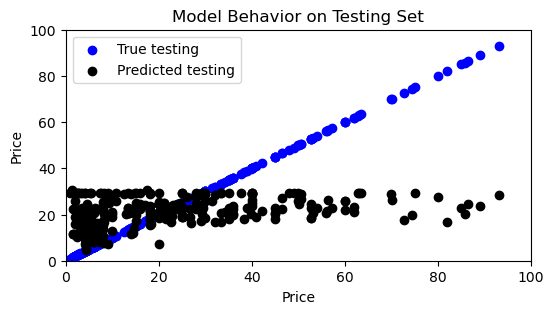

In [134]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 100)

In [135]:
# def svr_iterations(degrees):
#     for deg in range(degrees):
#         model = SVR(degree=deg)
#         model.fit(x_train, y_train)
#         y_pred = model.predict(xtest)
        
#         mae = mean_absolute_error(ytest, y_pred)
#         medae = median_absolute_error(ytest, y_pred)
#         rmse = mean_squared_error(ytest, y_pred, squared=False)
#         r2 = r2_score(ytest, y_pred)
#         score = model.score(xtest, ytest)
        
#         print('Degrees:', deg, 'Mean absolute error:', mae, 'Root mean squared error:', rmse, 'model score:', score)

# svr_iterations(5)

In [142]:
def svr_iterations():
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    for kern in kernels:
        model = SVR(kernel=kern)
        model.fit(x_train, y_train)
        y_pred = model.predict(xtest)
        
        mae = mean_absolute_error(ytest, y_pred)
        rmse = mean_squared_error(ytest, y_pred, squared=False)
        score = model.score(xtest, ytest)
        
        print('Kernel:', kern, 'Mean absolute error:', round(mae, 2), 'Root mean squared error:', round(rmse, 2), 'model score:', round(score, 2))
svr_iterations()

Kernel: linear Mean absolute error: 87.56 Root mean squared error: 317.78 model score: -0.05
Kernel: poly Mean absolute error: 88.03 Root mean squared error: 318.83 model score: -0.05
Kernel: rbf Mean absolute error: 87.79 Root mean squared error: 317.95 model score: -0.05
Kernel: sigmoid Mean absolute error: 88.38 Root mean squared error: 320.05 model score: -0.06


# Linear Regression Model

In [143]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(xtest)

mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)
score = model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

cv = cross_val_score(linear_model, x_train, y_train, cv=6)
print(cv)
print(cv.mean())

Mean absolute error: 143.75 Median absolute error: 94.11 Mean squared error: 101091.73 Root mean squared error: 272.33 score: -0.05
[ 0.05242693 -0.58744978  0.23628465  0.17510485  0.24238563  0.25843849]
0.0628651276773693


(0.0, 500.0)

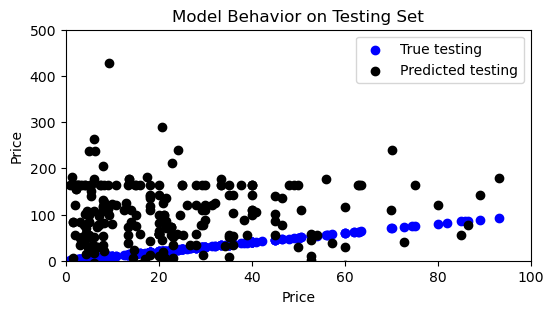

In [146]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, linear_model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 500)

# Decision Tree Regressor Model

In [147]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(xtest)

mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)
score = dt_model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

# cv = cross_val_score(dt_model, x_train, y_train, cv=6)
# print(cv)
# print(cv.mean())

Mean absolute error: 63.46 Median absolute error: 14.69 Mean squared error: 101091.73 Root mean squared error: 162.5 score: 0.73


(0.0, 500.0)

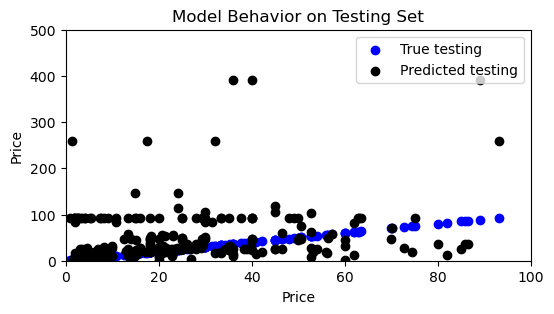

In [153]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, dt_model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 500)

# Random Forest Regressor Model

In [154]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(xtest)

mae = mean_absolute_error(ytest, y_pred)
medae = median_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)
score = rf_model.score(xtest, ytest)

print('Mean absolute error:', round(mae, 2), 'Median absolute error:', round(medae, 2), 'Mean squared error:', round(mse, 2), 'Root mean squared error:', round(rmse, 2), 'score:', round(score, 2))

# cv = cross_val_score(rf_model, x_train, y_train, cv=6)
# print(cv)
# print(cv.mean())

Mean absolute error: 62.08 Median absolute error: 15.39 Mean squared error: 101091.73 Root mean squared error: 156.59 score: 0.75


(0.0, 500.0)

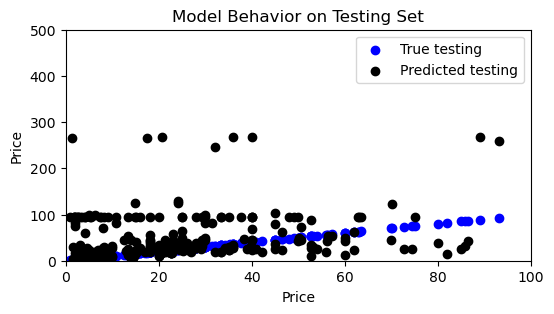

In [156]:
col_name = 'Price'

fig = plt.figure(figsize=(6,3))
plt.scatter(ytest, ytest, color = "blue")
plt.scatter(ytest, rf_model.predict(xtest), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Price')
plt.title("Model Behavior on Testing Set")
plt.xlim(0, 100)
plt.ylim(0, 500)